In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./Desktop/Data.csv")
df['Date'] = pd.to_datetime(df['Date']) #CONVERTING TO ACTUAL DATEtIME. THIS WILL HELP TO SPREAD THE DATES DURING PLOTTING
df

,Date,SP500,Google,RM,Rt,Dt
0,2018-01-02,2695.81,53.66,NaN,NaN,0
1,2018-01-03,2713.06,54.58,0.006378,0.017000,0
2,2018-01-04,2723.99,54.79,0.004021,0.003840,0
3,2018-01-05,2743.15,55.51,0.007009,0.013055,0
4,2018-01-08,2747.71,55.71,0.001661,0.003596,0
...,...,...,...,...,...,...
1686,2024-09-16,5633.09,158.06,0.001256,0.003803,0
1687,2024-09-17,5634.58,159.32,0.000264,0.007940,0
1688,2024-09-18,5618.26,159.81,-0.002901,0.003071,0
1689,2024-09-19,5713.64,162.14,0.016834,0.014475,0


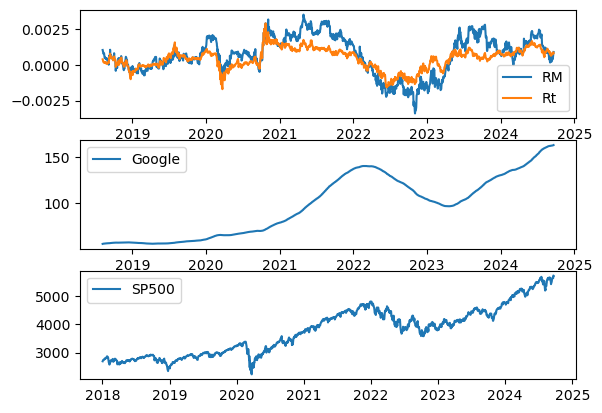

In [2]:
x = df.Date
y1 = df['Rt'].rolling(150).mean()
y2 = df['RM'].rolling(150).mean()
g = df['Google'].rolling(150).mean()

plt.subplot(3,1,1)
plt.plot(x, y1, label='RM')
plt.plot(x, y2, label='Rt')
plt.legend()


plt.subplot(3,1,2)
plt.plot(x, g, label='Google')
plt.legend()


plt.subplot(3,1,3)
plt.plot(x, df['SP500'], label='SP500')
plt.legend()



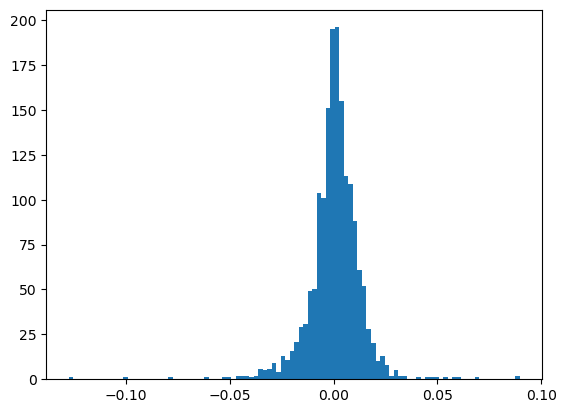

In [3]:
my_hist = plt.hist(df['RM'], bins=100)
#print(my_hist)

the above picture shows that its normally distributed. mean and S.D. need to find. 

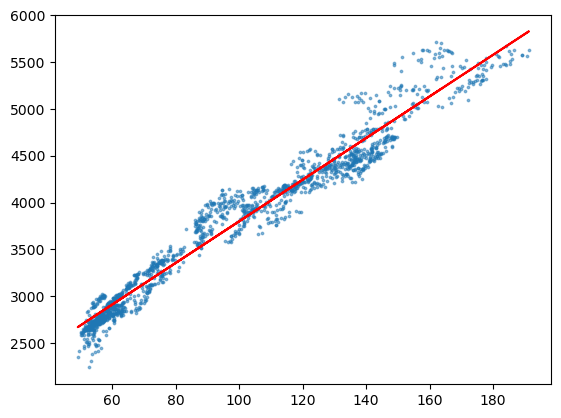

In [33]:
from scipy import stats
reg_x = df['Google']
reg_y = df['SP500']
slope, intercept, r, p, std_err = stats.linregress(reg_x, reg_y)
def myfunc(reg_x):
  return slope * reg_x + intercept

mymodel = list(map(myfunc, reg_x))

plt.scatter(reg_x, reg_y, s=3, alpha=0.5)
plt.plot(reg_x, mymodel, color='red')



In [91]:
print(f'R= {r}, slope = {slope}, intercecpt={intercept} ')


R= 0.9796605586713141, slope = 22.254346832926174, intercecpt=1572.751770463809 


In [95]:
from sklearn import linear_model
x_in2d = df[['Google']] # in sklearn single/multiple column, x must be 2d array i:e pd dataFrame, not series  
reg = linear_model.LinearRegression().fit(x_in2d, reg_y)
print(reg.coef_)
print(reg.intercept_)


[22.25434683]
1572.751770463809


In [105]:

predicted = reg.predict([[115]])
predicted


C:\Users\rupak\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4132.00165625])

In [7]:
df.describe()


,Date,SP500,Google,RM,Rt,Dt
count,1691,1691.000000,1691.000000,1690.000000,1690.000000,1691.000000
mean,2021-05-11 20:11:46.800709632,3766.757552,98.587741,0.000443,0.000660,0.000591
min,2018-01-02 00:00:00,2237.400000,49.230000,-0.127652,-0.123627,0.000000
25%,2019-09-07 12:00:00,2923.690000,61.120000,-0.004733,-0.008462,0.000000
50%,2021-05-12 00:00:00,3854.430000,96.110000,0.000873,0.001298,0.000000
75%,2023-01-15 00:00:00,4393.125000,131.220000,0.006854,0.010804,0.000000
max,2024-09-20 00:00:00,5713.640000,191.180000,0.089683,0.097348,1.000000
std,NaN,836.216251,36.811149,0.012634,0.019482,0.024318


In [8]:
import numpy as np

np.std(df['Google'])

36.80026305226472

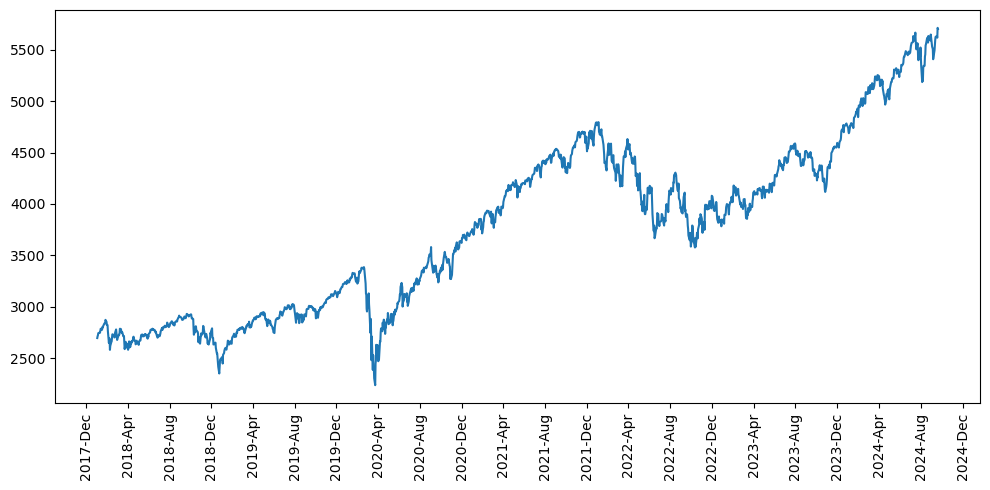

In [9]:
import matplotlib.dates as mdates
nx = np.array(df['Date'])
ny = np.array(df['SP500'])
fig, ax = plt.subplots( figsize=(10, 5))
ax.plot(nx, ny, label='ploting with numpy')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
#ax.xaxis.set_minor_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%Y%b'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
#plt.setp(ax.xaxis.get_minorticklabels(), rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


Binomial Distribution:

A school have 25% students in left handed. If I take 30 random students to check weather or not they are left-handed, The above graph shows the distribution. The x-axis is the number of students and y axis is counts/frequency. First I take 30 students and see how many of them are left handed. I get lets say 5 students. Again I take 30 random students, I got this time 8 students. Again third time I take 30 students and got 12 students lefthanded. I continued 150 times which is recordede in array above. 
n=30, p=0.25 
Let say I want to know the probability of getting 7 students lefthanded than I can use scipy stats.binom.pmf(k, n,p) put k=7, n & p are same as above. In scipy, to plot the whole distribution, arrays of k values(i:e n values 1-30) should be plugged in.

This is similer to cointoss example. I toss n= 10 trials and observe the result and repeat 200 times. In cointoss case, p=0.5 

note: n is large it approaches to normal distribution. 
Note: binomial is for descrete data. 
note: keep size as high as 1000 for better result. 
note: on x-axis we can see number of ticks are actually from n values

[ 8  6 11  8 11 10  5  8  6  9  7  7  6  6  8 10  6  7  8  5 10  7  7  8
  8  7  6 10  5 11  7  4  5  9  5  6  9  5  6  5  7  7  7  5  7  2  7  6
 12  6 11  4  7  9 10  5  8  5  6  6  6  8  9  4  5 10 11  9  6  9  8  5
  5  8  9  8  9  5  9  5  9  4  7  5  6 12 11  7  4  7  8  5  7 10  9  7
  8  8  7 11  4  6  4  8  5 11  7  9  7  8  7  8  8  3  7  7  9  9  3  7
  6 10  8  4  4  9 11  8 12  8  7 10  7  9  6 10  5  9  8 10  8  4  7  9
  7  7  4  7  8 16]


Text(0, 0.5, 'counts')

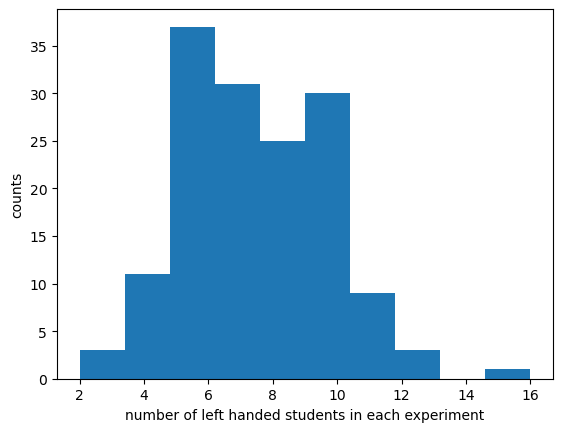

In [11]:
from numpy import random
import seaborn as sns
bi_x = random.binomial(n=30, p= 0.25, size=150)
print(bi_x)
plt.hist(bi_x)
plt.xlabel('number of left handed students in each experiment')
plt.ylabel('counts')



As we can see in the above chart 7 heads have the highest probability to accure. 

In Normal distribution, 
loc=mean value
scale=Standard deviation
size=array size or Sample size

In kopawa, the height of the people are normally distributed with mean 168 cm standard deviation of 4. Randomly selected 150 peoples heights are plotted in below chart.  

[173.49106738 166.71447453 169.73048455 169.60610687 172.00444171
 162.91442795 166.3365131  169.62069794 162.52115673 165.14289096
 162.32789649 169.75207776 164.35016862 171.21033521 166.45746714
 166.49743557 168.34306302 169.8743968  166.10538714 170.63889899
 161.59847291 161.37126305 169.47221784 159.6081884  171.04032367
 167.60960233 166.113537   165.12704322 168.46645778 169.9251422
 165.49809354 174.76779186 168.87310645 161.19901822 170.13431245
 164.38174428 166.31432192 168.05192178 174.13001292 168.43703816
 167.0304516  171.35387213 169.26172914 163.95828586 172.58124783
 169.77715982 165.9365621  169.01689784 166.05094736 168.82807436
 171.61720398 171.14983926 167.13963288 173.18763633 159.78531684
 170.53268447 168.55153393 170.06915134 170.67165148 168.5141288
 161.24782765 168.78169931 171.44719045 166.81240533 164.97603358
 165.52883703 160.47960778 163.75616424 172.83713614 168.29171241
 172.83268431 172.10793391 169.42443181 167.225739   171.8012061
 165.28296382

Text(0, 0.5, 'counts')

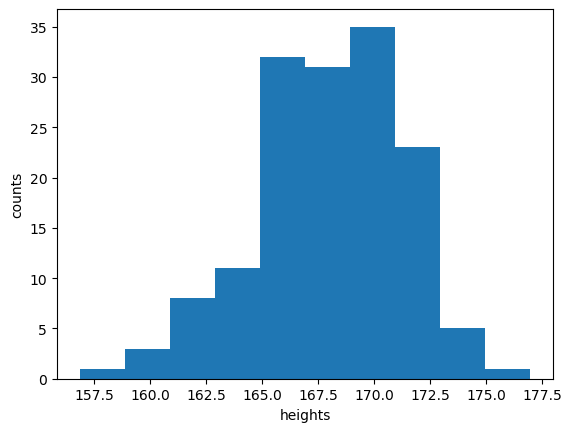

In [15]:
from numpy import random

x_norm = random.normal(loc=168, scale=4, size=150)
print(x_norm)
plt.hist(x_norm)
plt.xlabel('heights')
plt.ylabel('counts')